# Particle tracking (under construction)

*Prof. dr.ir. T.N.Olsthoorn*

*Heemstede, 261021

## Flow lines as opposed to stream lines
Particle tracking is one of the functions most used in a groundwater model. Contrary to stream lines that require steady-state 2D flow without sources and sinks, particles may always be tracked to create flow lines. Clearly, particles starting at the same location may not follow the same path if released at different times in a transient model. In the random walk technique particles are even given a random displacement at each time step to simulate dispersion, which alters the path of individual particles in an unforeseen manner, thus simulating dispersion.

Particle tracking in finite difference models is quite straightforward. The flows perpendicular to the cell faces are known and, therefore, the specific discharge at theses faces may be approximated by dividing by their surface area. Average. As the porosity in the cells at either side of a cell face may differ, so may the groundwater velocity perpendicular to the cell face, even though the specific discharge does not.

In finite difference modeling, the flow in `x`, `y` and `z`- direction, which is parallel to the axes of the model, is linearly interpolated between that at opposite cell faces. This implies that the flow in `x`-direction (and velocity for that matter) is only a function of `x`, the velocity in `y`-direction only a function of `y` and the one in `z`-direction only depends on `z`. This is consistent with the model assumptions and largely simplifies the analysis. However, for large cells it may not be accurate. So it may be necessary to use smaller cells where large variations in velocity occur in value and direction. On the other hand the elegance of this approach is that the divergence remains zero in a cell. This means no water is lost, so that the flow paths by themselves are consistent.

## Theory

It's easier to write equations in Lyx than it is to write them in markdown or pure LaTeX.

The idea is to use relative coordinates.

Because the elevation of cells in a 3D finite difference grid may vary from cell to cell in the same layer, it may jump when particles cross vertical cell faces. Exactly at such cell faces, the elevation is undetermined in such a grid. This makes it much more convenient to use relative coordinates, in which each cell of the grid is a cube of sides of length 1. To keep the travel time within each cell in each direction the same we divide the velocity in direction $x$ by $\Delta x$ and likewise in the other directions.

Because we only have the flows at the cell faces, we have to assume that the velocity varies linearly between two opposite cell faces. For the x-direction we thus obtain for an arbitrary cell $v_{x}=\frac{Q_{xL}}{\epsilon R\Delta y\Delta z}+\left(\frac{Q_{xr}-Q_{xl}}{\epsilon R\Delta y\Delta z}\right)\left(\frac{x-x_{L}}{\Delta x}\right)$

where $\epsilon$ is the effective porosity of the considered cell and $R$ is the retardation due to sorption ($R=1$ in the absence of sorption).

To change to the velocity in the grid that consists of unit cubes, we have

$$
v_{u}	=\frac{v_{x}}{\Delta x}
	=\frac{Q_{x0}}{\epsilon RV}+\frac{Q_{x0}-Q_{x1}}{\epsilon RV}\left(\frac{x-x_{0}}{\Delta x}\right)
	=v_{u0}+\left(v_{u1}-v{}_{u0}\right)\left(u-u_{0}\right)
	=v_{u0}+a_{u}\left(u-u_{0}\right)
$$

with

$$
a_{u}=v_{u1}-v_{u0}
$$

The index 0 denotes the left side of the cell and the index 1 denotes the right side. This corresponds with the relative local coordinates in the unit cube cell.

All values $v_{u0}$, $v_{u1}$ and $a_{u}$ can be computed a priori for all cells in the relative grid. The same is true for the other two axes, $y$, and $z$, that become directions $v$ and $w$ in the relative grid.

As long as we are within a single cell we can set

$$
U=u-u_{0}
$$

in which $0\le U\le1$ and $U$ is the local coordinate.

The travel time in this cell from intial position $U_s$ to an arbitrary position $U$ then follows from

$$
\frac{dU}{dt}=v_{u0}+a_{u}U
$$

$$
dt=\frac{dU}{v_{u0}+a_{u}U}
$$

$$
dt=\frac{1}{a_{u}}\frac{d\left(v_{u0}+a_{u}U\right)}{v_{u0}+a_{u}U}
$$

$$
a_{u}\left(t-t_{s}\right)=\ln\left(\frac{v_{u0}+a_{u}U}{v_{u0}+a_{u}U_{s}}\right)
$$

in which the index $s$ denotes the position at the start, $t=t_{s}$, $U=U_{s}$.

If $v_{u_0} >0$, then we find the time that the particle hits the cell face by setting $U=1$. If $v_{u_0}<0$ we find it by setting $U=0$.

Of course, this only makes sense if the argument of the $\ln(-)$ is greater than 0. That is, if the velocities at the two opposite cell faces have the same sign. If not, the velocity is zero somewhere within the cell and the particle can never reach the opposite face. The arrival time may then immediately be set equal to $\infty$.

Another problem occurs when $a_{u}=0$, i.e. when the velocities at opposite cell faces are the same. In that case the velocity is constant so that the arrival time can be obtained from

$$
t-t_{s}=\frac{U-U_{s}}{v_{u0}}
$$

Therefore we have to select the linear or the logarithmic equation to compute the time that the cell-face is it of set it to $\infty$ when it will ever be hit, which is also true of both $v_{u0}$ and $a_{u}$ are zero.

We do the same for the $v$ and the $w$ directions that correspond to $y$ and $z$ in the original grid.

The result is three hitting times, of which the smallest one determines when the particle firs hits one of the 6 cell faces of the cube. If this time is smaller than our end-time, we move the particle to that face and subtract the time from the original time, to get the time that it still has to travel. If the time is larger than the end-time, we set the time to the end-time and move the particle accordingly, after which the simulation for this particle has finished.

$$
a_{u}U=\left(v_{u0}+a_{u}U_{s}\right)e^{a_{u}\left(t-t_{s}\right)}-v_{u0}
$$

$$
U=U_{s}e^{a_{u}\left(t-t_{s}\right)}+\frac{v_{u0}}{a_{u}}\left(e^{a_{u}\left(t-t_{s}\right)}-1\right)
$$

and for the linear case

$$
U=\left(t-t_{s}\right)v_{u0}+U_{s}
$$

For these formulas to work, it is necessary that the the sign of the velocities is in line with the direction of the axis. In the relative grid we let $u$, $v$ and $w$ run in the direction of increasing cell indices. This is the case for the $x$ direction where increasing $x$ values coincide with increasing column indices. This is not true for the $y$ and the $z$ directions, where the coordinates run opposite to the cell indices in those directions. Therefore, we have to invert the sing of the $Q_{y}$ and $Q_{z}$ arrays front up.

When the end-time has not been reached, the particle crosses over to the next cell. We update its indices to that of the next cell and also update its relative coordinates $U$, $V$ and $W$ to reflect the starting position of the particle within the new cell.

Particles may end-up in sinks, i.e. cell from which water leaves the model. We will assume that particles have left the model when the enter a cell that is a large-enough sink, that is, a cell for which the total extraction is larger than $sinkFrac\times Q_{intot}$, where is chosen by the user as $0\le sinkFrac\le1$, usually 0.25 and $Q_{intot}$ is the total inflow of the cell through its cell faces.

Relative coordinates can be readily computed by interpolation using cell grid indices as known values like so:

$$
u=\mathrm{interp}\left(xp,\,xGr,\,\mathrm{arange}\left(\mathrm{len}\left(xGr\right)\right)\right)
$$

$$
U=u-\mathrm{floor}\left(u\right)
$$

where $xp$ is a grid coordinate, $xGr$ are the grid coordinates of the grid lines between the columns and $\mathrm{arange()}$ is the Python function that generates numbers between 0 and the specified number ($\mathrm{len}(xGr)$).

Computing grid coordinates from relative coordinates works the other way around

$$
x=\mathrm{interp}\left(U+i_{u},\,\mathrm{arange}\left(\mathrm{len}\left(xGr\right)\right),\,xGr\right)
$$

in which $i_{u}$ is the cell index of the particle along the $x$ direction, $u=U+i_{u}$, and $i_{u}=\mathrm{floor}\left(u\right)$.

In general, we should not have to worry about particles leaving the model, because the velocities perpendicular to all outer faces of the model are zero in the finite difference concept.

## Implementation


The logic of the particle tracking model is as follows:

* Switch to normalized coordinates $u$, $v$, and $w$
* Compute the velocities at all cell faces in all directions (6 values per cell)
* To track particles compute in local coordinates when they hit the walls of their local cell, which is a uit cube in th normalize grid. The local coordinats are all between 0 and 1 in each cell. To get the normalized coordinates, add the indices of the cell, $u = iu + U$ where $iu$ is the cell index along the $u$ axis and $U$ the local coordinate.
* Doing this and knowning by the sight of the velocity $vu$ wich cell face will be hit, we obtain three hitting times per particle. The smallest time is chosen, together with the corresponding cell face.
* The particle is moved over this smallest time interval, updating its three ocal coordinates.
* The index of the cell is updated for the direction into which the particle hits the cell facce.
* The local coordinate of the particle in this direction is reset: if the particle left into the direction of
inceasing grid index, it is reset to zero and 1 is added to its cell index is, if it left in opposite direction, it is set to 1.0 and its cell index is reduced by one.
* The coordinates in the other two directions where the particle did not hit the cell face, are left unchanged.

The time in the previous cell is subtracted from the remaining time, after which the procedure is repreated, as long as the remaining time is still larger than zero. After the remaining time has been used up by all particles that are still moving, the next time in the series for which we want particle coordinates has been reached. The particle coordinates are then saved after having them back-transformed to those of the original grid. This play is repeated until all particles have reached the final simulation time, or until no more flowing particles are presented in the model, because the last ones have been swallowed by sinks or stagnated near water divides.

Afterwards, the trackes can be displayed simultaneously or be simulated or animated. The stored partciles correspond to the times that were given to the model. The detail is therefore completely defined by the user.

## Verification

To check the particle tracking use some convenient analytical solutions

A cross section, thickness `H`, porosity and recharge `n`, with a water divide at `x=0` center obeys the following relations

$$
v_{x}=\frac{dx}{dt}=\frac{nx}{\epsilon H}\rightarrow\frac{dx}{x}=\frac{n}{\epsilon H}dt\rightarrow\ln\left(x\right)=\frac{n}{\epsilon H}t+C\,\,\,\,\left(\mbox{with}\,t=t_{0},\,x=x_{0}\right)
$$

$$
\ln\left(x_{0}\right)=\frac{n}{\epsilon H}t_{0}+C\rightarrow C=\ln\left(x_{0}\right)-\frac{n}{\epsilon H}t_{0}
$$

$$
\ln\left(\frac{x}{x_{0}}\right)=\frac{n}{\epsilon H}\left(t-t_{0}\right)\rightarrow x=x_{0}\exp\left(\frac{n}{\epsilon H}\left(t-t_{0}\right)\right)
$$

This can be used to check the travel time in the model in two directions.

Another simple check is a well in a confined aquifer. Here we have

$$
Qt=\epsilon H\pi R^{2}\rightarrow R=\sqrt{\frac{Qt}{\pi\epsilon H}}
$$

So set up a model, run it, contour the results, run fdm2path, and check its results by clicking a point near the well

### Example

In [1]:
# General preparation, loading necessary modules and setting sys.path
# to find user modules

import sys

myModules = "/Users/Theo/GRWMODELS/Python_projects/mfpy/modules/"

if myModules not in sys.path:
    sys.path.append(myModules)

import numpy as np
from importlib import reload
import matplotlib.pylab as plt

import mfgrid
import fdm
import mfpath
import mfetc
import mfexceptions as err
from importlib import reload # need this to reload modules already imported

## Example

The example using when we developed the stream lines is reused here to show both the stream lines and the tracked particles. They should match in the steady-state situaion, when particles are released on stream lines.

Cross section (flat) with heads, streamlines and some particle tracks, obtained by clicking on the figure when fdm2path is running (backward traces as times were negative, see input above). There is great detail near the sheet piling where all the streamlines converge, which can only be seen by zooming in. 

In [8]:
reload(fdm)

<module 'fdm' from '/Users/Theo/GRWMODELS/Python_projects/FDM_course/notebooks/fdm.py'>

Running in axial mode, y-values are ignored.


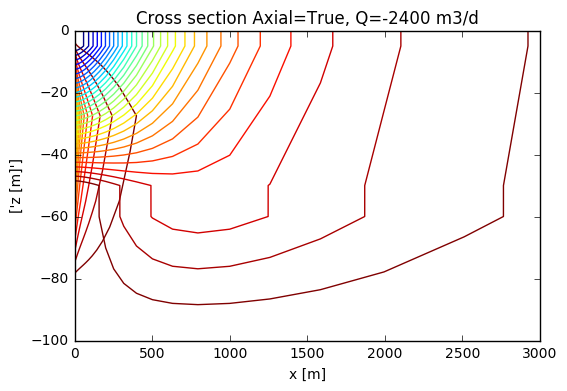

In [20]:
import numpy as np
import matplotlib.pylab as plt
import mfgrid
import fdm
import mfpath
import pdb

axial = True
Q    = -2400 if axial else 2.4 # m3/d if axial else m2/
por  = 0.35 # [-], effective porosity

xGr = np.logspace(-1, 4, 51)
yGr = np.array([-0.5, 0.5])
zGr = np.array([0., -5, -50, -60, -100])
gr   = mfgrid.Grid(xGr, yGr, zGr, axial)

IBOUND = gr.const(1); IBOUND[:,:,0] = -1 # head in top confining unit fixed
k      = gr.const(np.array([0.01, 10., 0.01, 20.]))
FH     = gr.const( 0.); 
FQ     = gr.const( 0.)
FQ[0, 0, 1] =  Q # insecond layer

# run flow model             
Out = fdm.fdm3(gr, k, k, k, FQ, FH, IBOUND)

Psi = fdm.psi(Out.Qx)

#pdb.set_trace()

# visualize
title = 'Cross section Axial={0}, Q={1} {2}'.format(axial, Q, 'm3/d' if axial else 'm2/d')
plt.figure()
xlim = [0, 3000.]
plt.setp(plt.gca(), xlabel='x [m]', ylabel=['z [m]'], title=title, xlim=xlim)
                             
plt.contour(gr.xm, gr.zm, Out.Phi[0].T, 30)
plt.contour(gr.xp, gr.zp, Psi, 30)
plt.show()

# path lines
T=np.linspace(0, 3650, 101) #time series
Xp = np.array([20, 20])
Yp = np.array([ 0., 0.])
Zp = np.array([-15., -100.])

#Pcl = mfpath.particle_tracker(gr, Q, Qx, Qy, Qz, por, T, Xp, Yp, Zp)

#R = np.sqrt(Q * T[-1] / (np.pi * por * np.sum(gr.dy)))  

In [112]:
import sys

myModules = '/Users/Theo/GRWMODELS/Python_projects/mfpy/modules/'

if not myModules in sys.path:
    sys.path.append(myModules)


import matplotlib.pylab as plt
import numpy as np  
import fdm
import mfpath
import mfgrid
import mfetc
import mfexceptions as err

from importlib import reload

In [113]:
%%writefile mfpath.py

import sys

myModules = '/Users/Theo/GRWMODELS/Python_projects/mfpy/modules/'

if not myModules in sys.path:
    sys.path.append(myModules)


import matplotlib.pylab as plt
import numpy as np
import fdm_d
import mfgrid   
import mfetc
import mfexceptions as err

from importlib import reload


def isSink(Q, Qx, Qy, Qz, sinkfrac=0.25, tol=1e-4):
    """Returns boolean array telling which cells are a sink
    
    A sink is when more than sinkfrac of the water entering the cell is
    extracted from it.
    
    Parameters
    ----------
    Q, Qx, Qy, Qz : ndarrays obtained from finite difference model
    sinkfrac : float, fraction of extraction relative to inflow
    tol : small value prevents division by zero if Qinto==0
    
    Returns
    -------
    boolean array that is True for a sink and False otherwise
    
    @TO 16106
    """ 
    Qinto = np.zeros(Q.shape)
    Qinto[:, 1:,:] =  Qx * (Qx>0)
    Qinto[:,:-1,:] = -Qx * (Qx<0)
    Qinto[ 1:,:,:] = -Qy * (Qy<0)
    Qinto[:-1,:,:] =  Qy * (Qy>0)
    Qinto[:,:, 1:] = -Qz * (Qz<0)
    Qinto[:,:,:-1] =  Qz * (Qz>0)
    
    return -Q * (Q<0) /(tol + Qinto) > sinkfrac


def fdte(v0, a, Ue, Us, Lstag, Llin, Llog):
    """Returns time to exit from cell along axis in normal situation.
    
    Separately deal with normal, linear and stagating situations
    in a vectorized manner
    
    Parameters:
    -----------
    v0 : ndarray, upfront velocity
    a  : ndarray, "accelleration"
    Ue : ndarray, exit local coordinate (0 or 1. depending sign of v0)
    Us : ndarray, local start location (between 0 and 1)
    Lstag : ndarray of bool, cells with water divide v0*v1<0
    Llin  : ndarray of bool, cells with constant velocity (a=00)
    Llog  : ndarray of bool, cell with v0 != v1 and not stagnation (normal cells)
    Returns
    -------
    dte : ndarray, time to exit (until hitting cell face) for each cell for current axis direction
    
    @TO 161027
    """
    te = np.zeros(Llog.shape)
    te[:] = np.inf # just for its shape

    #te[Lstag] = np.inf    
    te[Llin]  = (Ue[Llin] - Us[Llin])/v0[Llin]
    
    # numerator may be zero so update Llog
    numerator   = np.round((v0 + a * Ue), decimals=10)
    denominator = np.round((v0 + a * Us), decimals=10)
    
    Llog = (Llog * (denominator != 0) * (numerator !=0)) > 0

    te[Llog]  = (1/a[Llog]) * np.log(numerator[Llog] / denominator[Llog])
    return te


def fe(v0, a, dte, Us, Llin, Llog):
    """Resturns local end coordinate after appling a time
    
    Parameters:
    -----------
    v0 : ndarray, velocity upfront cell face
    a  : ndarray, accelleration
    dte : ndarray, time step to simulate from current position
    Us : ndarray, local startposition (0<Us<1)
    Llin : ndarray of bool, signals constant velocity in cell (use linar function)
    Llog : ndarray of bool, signals normal situaiton in cell (use log function)
    Returns:
    --------
    Output position in local coordinate for involved axis
    
    @TO 161027
    """
    # limit to prevent particle to overshoot to opposite face
    # in case of stagnation where v at opposite site == 0
    MAXEXP = 1.e20
    MINEXP = 1.e-20
    
    Ue = Us.copy() # just for its shape

    e_ = np.exp(a[Llog] * dte[Llog])
    e_ = np.fmax( np.fmin( e_, MAXEXP), MINEXP)
    Ue[Llog]= (v0[Llog]/a[Llog] + Us[Llog]) * e_ - v0[Llog]/a[Llog]
    
    Ue[Llin] = dte[Llin] * v0[Llin] + Us[Llin]
    return Ue # exit position in local coordinate


def particle_tracker(gr, Q, Qx, Qy, Qz, por, T=100., particles=None, \
                     markers='+o*.xsdph^v<>', retardation=1.0, sinkfrac=0.25, tol=1e-6):
    """3D particle tracker, returning (XP, YP, ZP) particle coordinates

    To use this function:
        generate a 3D steady-state model, launch this function using its produced
        arrays Q, Qx, Qy, Qz and the array por
        If no starting values are used you must click on an existing picture and
        the flow path will be immedidately drawn with markers at the given time points in T
        Repeat this for more lines. Click te right hand button to stop
        Type fdm3path for selftest and demo

    Parameters:
    -----------
    gr : mfgrid.Grid object
        gr contains the information about the finite difference grid
        For axially symmetric models set axial=True in the call to Grid
            gr = mfgrid.Grid(xGr, yGr, zGr, axial=True)
    Q, Qx, Qy, Qz : np.ndarray, [L3/T]
        arrays [L3/T] output by the fintie difference model
    por : np.ndarray, [- ]
        effective porsities
    T  : np.ndarray, [T]
        vector of times at which pints markers are desired
            A marker at t=0 will always be placed
            Use negative times vor backward tracing
        A single value denotes an end time and 0 is prepended.
        In vectors T[0] is the time of the inital particles.
    markers : string, [-]
        a listis of letters or signs denoting legal markers in matplotlib.
        These markers will be used in sequence and repeated when used up.
          e.g.   '>+o*.xsdph\^{}v<'
    particles : ndarray
        array of particle coodinates to start the tracking with. The shape must
        be (Np, 3). If shape is (Np, 2) , then [X, Z) is assumed as for a cross section.
    retardation : float
        use value if applicable
    sinkfrac : float
        criterion when particle are to be removed from sink cells.
        sinkfrac is the extraction as a fraction of the total inflow to the cell.
    tol : float
        determins what is considered to be zero, use 1e-6 for instance

    Returns:
    --------
    (XP, YP, ZP, TP, pStat) : np.ndarray, [L] and [T]
        XP, XP, ZP and TP have size(Np, Nt) where Np the number of particles
        and Nt the number of times with T[0] the starting value and XP[:,0] etc
        the inital coordinates.
        pStat is an ndarray of int showing the status of each particle at each time
            pStat = -1 : particle out of model grid
            pStat = -2 : particle caught in sink
            pStat =  0 : particle reached end time
            pStat > 0  : particle is still moving in the model

    See also:
    ---------
    fdm.fmd3, fdm.fdm3t

    TO 070424 070501 140420

    Copyright 2009-2016 Theo Olsthoorn, TU-Delft and Waternet, without any warranty
    under free software foundation GNU license version 3 or later

    Approach:
    ---------
    The idea is that we convert the model to cubes of unit length with all axis ascending.
    The velocities will be converted to this grid. But (we hope) that the flows can be maintained.
    Have to figure out if and how this works. We do this in 3D. Local coordinates may be denoted
    by u, v, w for x, y, z. This approach will allow dealing with each axis in the same way, so that
    functions for this can be written and applied to each axis in sequence. Then we don't duplicate code
    and, therefore, errors. Make it as pythonic as possible and as short and robust as possible.
    If possible, this code shoul also work with massive numbers of points, so vectorize where possible.
    This will allow simple transfer to the next chapter or even make it superfluous.
    """    

    import numpy as np
    from collections import namedtuple
    import pdb
    
    Out = namedtuple('Particles', ['X', 'Y', 'Z', 'up', 'vp', 'wp', 'T', 'status', 'grid'])
    Out.__doc__ = \
        """Output of particle tracker
        X, Y, Z = ndarray, coordinates shape (Np,Nt)
        T = time, ndarray shape (Np,Nt)
            T is kept at time that status of particle becomes less than zero
        status = ndarray of int, shape (Np,Nt)
            -2: particle outside model
            -1: particle captured by sink
             0: particle stagged in stagnation point
             1: partble moving through model grid
        grid : mfgrid.Grid object, holding the original grid
                """

    # The code is set-up to allow vectorization and thus moving large numbers of particles
    # simultaneously

    # All computations are done with the normalized grid inwhich every cell is a cube
    # of size 1x1x1 and in which ascending indices correspond to ascending axis values
    # The normalize grid has    
    #     shape of normalized grid is same as original
    #     Nu=Nx, Nv=Ny, Nw=Nz
    #     x-->u, y-->v z-->w,
    #     0<=0<=Nu+1, 0 <= v <= Nv+1, 0 <= w <= Nw+1
    # conversion between coordinates see: norm2grid and grid2norm
    """Internal parameters
       ------------------
       Nu, Nv, Nw = gr.Nx, gr.Ny, gr.Nz
       tNext = T[it], it = current time target index
           Cell based:
           -----------
           vc_u0, vc_u1 : normalized velocities in cell in u-direction
           vc_v0, vc_v1 : in v-direction (y)
           vc_w0, vc_w1 : in w-direction (z)
           au, av, aw : "accelleration (vc_u1-vc_u0) for u-direction etc.
           Ue, Ve, We : exit locations in local coordinates 0<Ue<1, 1.0 if vc0_u1>0 else 0.0, etc.
           dUe, dVe, dWe : local coordinate oupdate when paricle leaves cell  1 v<0 else  0
           diu, div, diw : cell index update when particle leaves in direction -1 if <0 else +1
           NOD : ndarray of int, global cell indices           
           Vcell : ndarray, cell volume times effecitve porosity times retardation
           Particle base:
           --------------
           Xp, Yp, Zp   : grid coordinates of particles:
                               gr.x[0]<Xp<gr.x[-1]
                               gr.y[0]>Yp>gr.y[-1]
                               gr.z[0]>Zp>gr.z[-1] # z varies per cell
           up, vp, wp   : normalized grid coordinaes: 0<up<Nu+1, 0<vp<Nv+1, 0<wp<Nw+1
           u_, v_, w_   : up[:,it], vp[:,it], wp[:,it] for convenience
           iup, ivp, iwp: grid cell of particle = np.array(np.floor(up), dtype=int) etc.           
           U, V, W      : local grid coordinates U=up-iu, V=vp-iv, V=wp-iw, all 0<U<1 etc.
           IC : ndarray of int, cell indices for particles (where they currently are)
           Ic : cell indices of only the considered (moving) particles, to select cell info
           Lp : indices of moving particles in the particle array, to select particles not cells
                   lenght of Ic and Lp must alows be the same, as the same particles are targeted.
           Dte : (Np, 4) time until particle exits cell, column 4 = tNext
           dte : minumum time until particle hits any of its current cell faces
           Ie : index Te, axis=1, showing which column (direction) has min time (knnow where paticle goes next)
           Lstag_u : ndarray of bool, tells whether vu is zero within cell, etc. for vv and vw
           Llin_u : ndarray of bool, tells whether vu is constant in cell, etc. for vv and vw
           Llog_u : ndarray of bool, tells whether vu varies and log function is applicable, etc voor vv and vw

    """
    # Constants for particle status
    ACTIVE           = +1
    INACTIVE         =  0
    OUT_OF_GRID      = -1
    CAPTURED_BY_SINK = -2
    
    Nv, Nu, Nw = gr.shape
    
    # For rounding near edges and telling whether v = constant
    digits = int(abs(np.log10(tol)))

    # Assert correct shapes of input arrays:
    if Q.shape != gr.shape:
        raise
    if Qx.shape != (Nv, Nu-1, Nw):
        raise err.InputError("","Shape of Qx {0} must equal {1}".\
                             format(repr(Qz.shape), repr((Nv, Nu-1, Nw)))\
                            )
    if Qy.shape != (Nv-1, Nu, Nw):
        raise err.InputError("","Shape of Qy {0} must equal {1}".
                             format(repr(Qy.shape), repr((Nv-1, Nu, Nw)))
                            )
    if Qz.shape != (Nv, Nu, Nw-1):
        raise err.InputError("","shape of Qz {0} must equals {1}".
                             format(repr(Qz.shape), repr((Nv, Nu, Nw-1)))
                            )
    if por.shape != (Nv, Nu, Nw):
        raise err.InputError("","shape of por {0} must equal {1}".
                             format(repr(por.shape), repr((Nv, Nu, Nw)))
                            )

    if particles is None:
        raise err.InputError("",
            "Interactive particle input not yet implemented, use array of Npx3 x,y,z points")
    if isinstance(particles, np.ndarray):
        if particles.shape[1] != 2 and particles.shape[1] != 3:
            raise err.InputError("","A particle array must have shape (Np, 2) or (Np, 3),\n\
                    that is: [Xp, Zp] or [Xp, Yp, Zp]")
        if particles.shape[1] == 2:
            # Assume x and z are given, add zeros for y
            Xp = particles[:,0]
            Yp = np.zeros(Xp.shape)
            Zp = particles[:,1]
        else:
            Xp = particles[:,0]
            Yp = particles[:,1]
            Zp = particles[:,2]
            particles = np.hstack((particles[:,0], np.zeros(particles[:,0].shape), particles[:,-1]))
    elif isinstance(particles, (tuple, list)):
        if len(particles) != 2 and len(particles) != 3:
            raise err.InputError("","A particles tuple or list must consist of (Xp,Zp) or (Zp,Yp,Zp)")
        if len(particles) == 2:
            Xp = particles[0]
            Yp = np.zeros(Xp.shape)
            Zp = particles[1]
        else:
            Xp = particles[0]
            Yp = particles[1]
            Zp = particles[2]
    else:
        raise err.IntputError("","Particles must be an ndarray, a tuple or a list\n\
            holding [Xp,Zp] or [Xp,Yp,Zp] particle coordinates")
    if len(Xp) != len(Yp) or len(Xp) != len(Zp):
        raise err.InputError("",
                    "length of particle coordinates Xp, Yp, and Zp must be the same.")

    # make sure T has at least two times, add 0. if only onte time is given
    if len(T)<2:
        T = np.array([0., T])
    
    # Set-up info for cells =========================================
    
    # cell volume, multiplied by retardation, to tacke linear sorption
    Vcells = gr.Volume * por * retardation
    
    # initialize velocities at cell faces
    shp = gr.shape
    vc_u0 = np.zeros(shp)
    vc_u1 = np.zeros(shp)
    vc_v0 = np.zeros(shp)
    vc_v1 = np.zeros(shp)
    vc_w0 = np.zeros(shp)
    vc_w1 = np.zeros(shp)
    # ToDo: check that these variables get their own copy, not refs to the same array

    forward = (T[-1]>T[0])
    print('Forward tracking, because T is ascending')

    # Set velocities at cell faces and  ...
    #   take sign of Q into consideration (to align
    #   v with ascending axies in normalized grid
    vc_u0[:, 1:,:] = np.round( Qx * forward / Vcells[:, 1:,:], decimals=digits)
    vc_u1[:,:-1,:] = np.round( Qx * forward / Vcells[:,:-1,:], decimals=digits)
    vc_v0[ 1:,:,:] = np.round(-Qy * forward / Vcells[ 1:,:,:], decimals=digits)
    vc_v1[:-1,:,:] = np.round(-Qy * forward / Vcells[:-1,:,:], decimals=digits)
    vc_w0[:,:, 1:] = np.round(-Qz * forward / Vcells[:,:, 1:], decimals=digits)
    vc_w1[:,:,:-1] = np.round(-Qz * forward / Vcells[:,:,:-1], decimals=digits)

    # Only vectors needed for effecive indexiing
    vc_u0 = vc_u0.ravel()
    vc_u1 = vc_u1.ravel()
    vc_v0 = vc_v0.ravel()
    vc_v1 = vc_v1.ravel()
    vc_w0 = vc_w0.ravel()
    vc_w1 = vc_w1.ravel()

    # "accelerations", round, so that comparison with zero makes sense
    au = np.round(vc_u1 - vc_u0, decimals=digits)
    av = np.round(vc_v1 - vc_v0, decimals=digits)
    aw = np.round(vc_w1 - vc_w0, decimals=digits)

    # Exit locations for all cells, depending direction of velocity,
    Ue = np.zeros(shp).ravel();     Ue[vc_u0>0.] = 1.
    Ve = np.zeros(shp).ravel();     Ve[vc_v0>0.] = 1.
    We = np.zeros(shp).ravel();     We[vc_w0>0.] = 1.

    # Cell index update when leaving cell
    diu = np.ones(shp, dtype=int).ravel();   diu[vc_u0<0] = -1;
    div = np.ones(shp, dtype=int).ravel();   div[vc_v0<0] = -1;
    diw = np.ones(shp, dtype=int).ravel();   diw[vc_w0<0] = -1;

    # Cell local coordinate update when leaving cell
    dUe = np.zeros(shp).ravel();   dUe[vc_u0<0] = 1.
    dVe = np.zeros(shp).ravel();   dVe[vc_v0<0] = 1.
    dWe = np.zeros(shp).ravel();   dUe[vc_w0<0] = 1.
    
    # Boolean arrays to select the correct time and postion functions
    # Constant velocity in these cells:
    AND = np.logical_and
    OR  = np.logical_or
    NOT = np.logical_not
    
    Llin_u = AND(au == 0., vc_u0!=0)
    Llin_v = AND(av == 0., vc_v0!=0)
    Llin_w = AND(aw == 0., vc_w0!=0)

    # Stagnation occurs in these cells:
    Lstag_u = OR( (vc_u0 * vc_u1) < 0., AND(au==0., vc_u0==0) )
    Lstag_v = OR( (vc_v0 * vc_v1) < 0., AND(av==0., vc_v0==0) )
    Lstag_w = OR( (vc_w0 * vc_w1) < 0., AND(aw==0., vc_w0==0) )

    # Normal situation in these cells:
    Llog_u = NOT( OR(Lstag_u, Llin_u))
    Llog_v = NOT( OR(Lstag_v, Llin_v))
    Llog_w = NOT( OR(Lstag_w, Llin_w))
    
    # Set-up information for the particles ===================================
    
    # Number of particles and number of time steps:
    T = T if len(T)>1 else nparray([0.0, T])
    Nt = len(T)
    Np = len(Xp)
    
    # Initialize pparticle output arrays
    Out.X = np.hstack((Xp.reshape(Np,1), np.zeros((Np, Nt-1))))
    Out.Y = np.hstack((Yp.reshape(Np,1), np.zeros((Np, Nt-1))))
    Out.Z = np.hstack((Zp.reshape(Np,1), np.zeros((Np, Nt-1))))
    
    Out.up = np.zeros((Np, Nt)) * np.NaN
    Out.vp = np.zeros((Np, Nt)) * np.NaN
    Out.wp = np.zeros((Np, Nt)) * np.NaN

    Out.T = np.zeros((Np, Nt))
    Out.status = np.zeros((Np, Nt), dtype=int)
    Out.status[:,:] = INACTIVE
    
    TRUNC = lambda u,N: np.fmin(np.array(np.floor(u), dtype=int), N-1)
    
    # Cells thar are sinks
    Isink = isSink(Q, Qx, Qy, Qz, sinkfrac).ravel()

    # Inactive cells in the model
    Inactive = AND(vc_u0==0.,
       AND(vc_u1==0.,
           AND(vc_v0==0.,
              AND(vc_v1==0.,
                 AND(vc_w0==0., vc_w1==0.)))))

    # simulation loop
    for it, tNext in enumerate(T):
        
        #print('Time = {0:.0f} d'.format(T[it]))

        # status for the initial time T[0]
        if it==0:
            # initialize
            Out.T[:,it] = T[it]
            Dte = np.zeros((Np, 4))
            U, iup = gr.U(Out.X[:,it])
            V, ivp = gr.V(Out.Y[:,it])
            W, iwp = gr.W(Out.X[:,it], Out.Y[:,it], Out.Z[:,it])
            Out.up[:,it] = U + iup
            Out.vp[:,it] = V + ivp
            Out.wp[:,it] = W + iwp

            # Which particles are potentially inside the model and active?
            Lp = NOT( OR( np.isnan(U),
                         OR( np.isnan(V),
                            OR( np.isnan(W),
                               OR( iup < 0,
                                   OR( ivp < 0, iwp < 0))))))
            IC = ivp * Nu * Nw + iup * Nw + iwp # cell number where particles are intNaN if out of model
            Ic = IC[Lp]
            
            status = np.ones(np.sum(Lp),)
            status[ :           ] = ACTIVE
            status[Isink[Ic]    ] = CAPTURED_BY_SINK
            status[Inactive[Ic] ] = INACTIVE

            #pdb.set_trace()
            # Which particles are active ?
            Out.status[Lp,           it] = status
            Out.status[NOT(Lp),      it] = OUT_OF_GRID
            
            # Update active particles
            Lp = (Out.status[:,it] == ACTIVE)
            Ic =IC[Lp] # update
            
            # Update position of active particles
            # Normalized coords;  cell index         ;  relative coordinate in cell 
            u_ = Out.up[Lp, it];  iup = TRUNC(u_, Nu);  U = u_ - iup 
            v_ = Out.vp[Lp, it];  ivp = TRUNC(v_, Nv);  V = v_ - ivp
            w_ = Out.wp[Lp, it];  iwp = TRUNC(w_, Nw);  W = w_ - iwp
            continue

        # Start values for current loop
        Out.T[:, it] = Out.T[:, it-1]
        
        Out.status[:,it] = Out.status[:,it-1]
        
        if  not np.any(Out.status[:,it-1] == ACTIVE):
            print("Check here:")
            #pdb.set_trace()
            # Pad status and the remaining times in the arrays and quit
            Out.status[:,it:] = Out.status[:,it:it+1] * np.ones((1, Nt - it))
            Out.up[:, it:] = Out.up[:, it-1:it] * np.ones((1, Nt - it))
            Out.vp[:, it:] = Out.vp[:, it-1:it] * np.ones((1, Nt - it))
            Out.wp[:, it:] = Out.wp[:, it-1:it] * np.ones((1, Nt - it))
            Out.X[:,  it:] = Out.X[ :, it-1:it] * np.ones((1, Nt - it))
            Out.Y[:,  it:] = Out.Y[ :, it-1:it] * np.ones((1, Nt - it))
            Out.Z[:,  it:] = Out.Z[ :, it-1:it] * np.ones((1, Nt - it))
            print('All particles captured, job finished.')
            break
        else:
            # Copy position for not-active particles to next time
            Out.X[:, it] = Out.X[:, it-1]
            Out.Y[:, it] = Out.Y[:, it-1]
            Out.Z[:, it] = Out.Z[:, it-1]
        
        Out.up[:, it] = Out.up[:, it-1]    
        Out.vp[:, it] = Out.vp[:, it-1]
        Out.wp[:, it] = Out.wp[:, it-1]

        at_tNext = np.ones(Np,) < 0 # flag telling if particles are at t=tNext
        
        Lp = (Out.status[:,it] == ACTIVE)  # Indices of particles that are still active            
        Ic = IC[Lp] # Indices of cells where these particles are and still moving

        tRem = tNext - Out.T[Lp, it]        # time remaining until tNext

        # track till next time
        counter = 0
        MAXLOOP = 500
        while True and (counter < MAXLOOP):  # no more references to the past
            counter += 1
            
            #print('.', end='')

            u_ = Out.up[Lp, it]; iup = TRUNC(u_, Nu); U = u_ - iup
            v_ = Out.vp[Lp, it]; ivp = TRUNC(v_, Nv); V = v_ - ivp
            w_ = Out.wp[Lp, it]; iwp = TRUNC(w_, Nw); W = w_ - iwp
            
            # if particle at cell border and moving out, update to new cell
            #pdb.set_trace()
            iup[ AND(vc_u0[Ic]<0, U==0.)] -= 1
            ivp[ AND(vc_v0[Ic]<0, V==0.)] -= 1
            iwp[ AND(vc_w0[Ic]<0, W==0.)] -= 1
            
            iup[ AND(vc_u1[Ic]>0, U==1.)] += 1
            ivp[ AND(vc_v1[Ic]>0, V==1.)] += 1
            iwp[ AND(vc_w1[Ic]>0, W==1.)] += 1

            U[ AND(vc_u0[Ic]<0, U==0.)] = 1.0
            V[ AND(vc_v0[Ic]<0, V==0.)] = 1.0
            W[ AND(vc_w0[Ic]<0, W==0.)] = 1.0
            
            U[ AND(vc_u1[Ic]>0, U==1.)] = 0.0
            V[ AND(vc_v1[Ic]>0, V==1.)] = 0.0
            W[ AND(vc_w1[Ic]>0, W==1.)] = 0.0
            
            # Of course, also update cell indices
            Ic = ivp * Nu * Nw + iup * Nw + iwp
            
            # exit times from current cells
            #       vLeft      acc     i     tStart Uexit Ustart
            # Function computes exit time in the 3 grid directions
            #pdb.set_trace()
            
            #         fdte(v0       , a,      Ue    , Us    , LStag      , Lin       , Log)
            Dte[Lp,0] = fdte(vc_u0[Ic], au[Ic], Ue[Ic], U, Lstag_u[Ic], Llin_u[Ic], Llog_u[Ic])
            Dte[Lp,1] = fdte(vc_v0[Ic], av[Ic], Ve[Ic], V, Lstag_v[Ic], Llin_v[Ic], Llog_v[Ic])
            Dte[Lp,2] = fdte(vc_w0[Ic], aw[Ic], We[Ic], W, Lstag_w[Ic], Llin_w[Ic], Llog_w[Ic])
            Dte[Lp,3] = tRem
            
            #print(Lp)
            #print(Ic)
            #print(Dte)

            # true exit time is minimum of these three
            dte = np.min(   Dte[Lp], axis=1)
            Ie  = np.argmin(Dte[Lp], axis=1)

            # Update the three local coordinates
            #        fe(v0       , a    , dte ,Us   , Llin      , Llog)
            U = fe(vc_u0[Ic], au[Ic], dte, U, Llin_u[Ic], Llog_u[Ic])
            V = fe(vc_v0[Ic], av[Ic], dte, V, Llin_v[Ic], Llog_v[Ic])
            W = fe(vc_w0[Ic], aw[Ic], dte, W, Llin_w[Ic], Llog_w[Ic])
            
            # Update local coordinates upon crossing cell face
            U[Ie==0] += dUe[Ic][Ie==0]
            V[Ie==1] += dVe[Ic][Ie==1]
            W[Ie==2] += dWe[Ic][Ie==2]

            # Update cell index upon ccrossing a cell face
            iup[Ie==0] += diu[Ic][Ie==0] 
            ivp[Ie==1] += div[Ic][Ie==1]
            iwp[Ie==2] += diw[Ic][Ie==2]

            # Update normalized coordinates
            u_ = U + iup
            v_ = V + ivp
            w_ = W + iwp

            # Paticles are now here in the normalized grid
            Out.up[Lp, it] = u_
            Out.vp[Lp, it] = v_
            Out.wp[Lp, it] = w_

            # Particles are now here in the real world grid
            Out.X[Lp,it], Out.Y[Lp,it], Out.Z[Lp,it] = gr.uvw2xyz(u_, v_, w_)

            # Particle times are now:
            Out.T[Lp, it] += dte
            
            # Their remaining tracking time until tNext target time is:
            tRem = tNext - Out.T[Lp, it]
            
            # Mark points that have arived at tNext
            at_tNext[Lp] = (tRem == 0.)
            
            # Have all particles traveled until their t==tNext, i.e. their tRem==0 ?
            all_at_tNext = np.all(at_tNext[Lp])

            # Particles are now in these cells
            IC[Lp]  = ivp * Nu * Nw + iup * Nw + iwp
 
            # Particles that movedd out of the grid
            outOfGrid = OR(iup<0,
                           OR(iup>Nu,
                              OR(ivp<0,
                                OR(ivp>Nv,
                                  OR(iwp<0, iwp>Nw)))))

            
            # ############ Update status for these particles and this time ############
            Ic = IC[Lp]
            status = Out.status[Lp,it] # previous status of these particles
            status[outOfGrid]    = OUT_OF_GRID # update their status
            status[Isink[Ic]]    = CAPTURED_BY_SINK
            status[Inactive[Ic]] = INACTIVE
            Out.status[Lp,it]    = status # update status in main array

            # Remaining particles and their position for next cycle
            Lp = AND( Out.status[:,it] == ACTIVE, NOT (at_tNext) )

            if np.any(Lp):
                # Next cycle in while-loop
                if counter>20:
                    #pdb.set_trace()
                    pass
                
                print("Still {0:5d} 4 active particles, while-counter = {1:4d}"
                                                      .format(np.sum(Lp), counter))
                Ic = IC[Lp] # Get their global cell index
                at_tNext[Lp] = False # Reset their tNext arrival flag
                tRem = tNext - Out.T[Lp,it] # Reset their time till tNext
            else:
                 # No particles or all of them arrived at tNext
                print('Done for time[{0:3d}]={1:10.0f} d'.format(it,T[it]))
                break # Break out of while and do next time in for-loop

    Out.grid = gr
    
    print('Particle tracking ready.')
    return Out



Overwriting mfpath.py


In [114]:
reload(mfpath)

<module 'mfpath' from '/Users/Theo/GRWMODELS/Python_projects/FDM_course/notebooks/mfpath.py'>

In [115]:
reload(mfgrid)

<module 'mfgrid' from '/Users/Theo/GRWMODELS/Python_projects/mfpy/modules/mfgrid.py'>

Compute particle positions ...
Forward tracking, because T is ascending
Done for time[  1]=      1500 d
Done for time[  2]=      3000 d
Done for time[  3]=      4500 d
Done for time[  4]=      6000 d
Still     1 4 active particles, while-counter =    1
Done for time[  5]=      7500 d
Done for time[  6]=      9000 d
Done for time[  7]=     10500 d
Still     1 4 active particles, while-counter =    1
Still     1 4 active particles, while-counter =    2
Done for time[  8]=     12000 d
Still     1 4 active particles, while-counter =    1
Done for time[  9]=     13500 d
Done for time[ 10]=     15000 d
Done for time[ 11]=     16500 d
Still     1 4 active particles, while-counter =    1
Still     1 4 active particles, while-counter =    2
Done for time[ 12]=     18000 d
Still     2 4 active particles, while-counter =    1
Still     2 4 active particles, while-counter =    2
Done for time[ 13]=     19500 d
Done for time[ 14]=     21000 d
Still     1 4 active particles, while-counter =    1
Don

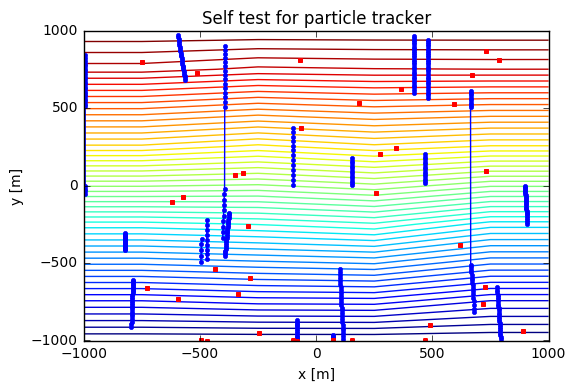

In [116]:
## %matplotlib notebook
import matplotlib.pylab as plt
import mfgrid
import fdm_d
import pdb

#def selftest():
"""selftest for fdm2path, called when fdm2path is run as a scrt."""

plt.close("all")
D   = 100. # m, aquifer thickness
k   =10.0 # m/d, conductivity
rch = 0.000 # m/d, recharge rate
Q = -1200 # m3/d, well
L = 1000. # halfwidth of model
w = 500.
nw = int(2*L/w)+1
ind = lambda u, U : int(np.array(np.floor(np.interp(u, U, np.arange(len(U)))), dtype=int))

xGr = np.hstack((-1.0001*L, L*1.0001, np.linspace(-L, L, nw)))
yGr = np.hstack((-1.0001*L, L*1.0001, np.linspace(-L, L, nw)))
zGr = np.linspace(0, -D, 4)
gr  = mfgrid.Grid(xGr, yGr, zGr)

#normalized grid
uGr = np.arange(gr.Nx+1)
vGr = np.arange(gr.Ny+1)
wGr = np.arange(gr.Nz+1)
ngr = mfgrid.Grid(uGr, vGr, wGr)

Np = 1000
if False:
    Xp = np.linspace(-L, L, Np)
    Yp = np.linspace(-L, L, Np)
    Zp = np.linspace(0, -D, Np)
else:
    Xp = (np.random.rand(Np) - 0.5 ) * 2 * L
    Yp = (np.random.rand(Np) - 0.5 ) * 2 * L
    Zp = (np.random.rand(Np) - 0.5 ) * 2 * -D
    
up = gr.up(Xp)
vp = gr.vp(Yp)
wp = gr.wp(Xp, Yp, Zp)

if False: # show grid and normalized grid with particles
    plt.figure(1)
    plt.xlabel('x [m]'); plt.ylabel('y [m]'); plt.title('Particles in grid coordinates')
    gr.plot_grid('c')
    plt.plot(Xp, Yp, 'r.')

    plt.figure(2)
    plt.xlabel('u [-]'); plt.ylabel('v [-]'); plt.title('Particles in normalized coordinates')
    ngr.plot_grid('c')
    plt.plot(up, vp, 'b.')
    plt.show()

rch = 0.
    
IBOUND = np.array(gr.const(1), dtype=int)
K  = np.random.rand(gr.Nod).reshape(gr.shape) * k
FH = np.random.rand(gr.Nod).reshape(gr.shape)*5.
FQ = rch*gr.Area.reshape((gr.Ny, gr.Nx, 1)) * np.ones(gr.shape);  # FQ[iyw, ixw, -1] = Q

if False:
    IBOUND[:,[0, -1], :] = -1
    FH[:, 0,:] = 2.
    FH[:,-1,:] = 0.
else:
    IBOUND[[0, -1], :, :] = -1
    FH[0, :,:] = 2.
    FH[-1,:,:] = 0.

if False: # Use inactive area
    x1 = -1500; ix1 = ind(x1, gr.x)
    x2 =   500; ix2 = ind(x2, gr.x)
    y1 =  -800; iy1 = ind(-y1, -gr.y)
    y2 = -1200; iy2 = ind(-y2, -gr.y)
    IBOUND[iy1:iy2, ix1:ix2, :]=0  # deepest layer

if False: # well location
    xw  = 500; ixw = ind( xw, gr.x)
    yw  = 1200; iyw = ind(-yw,-gr.y)
    izw = gr.Nz # last layer


# run fdm model
Out = fdm_d.fdm3(gr, K, K, K, FQ, FH, IBOUND)

# Tracking time
T = np.linspace(0, 36000, 25)  # array([0, 60, 365, 3650, 25*365, 100*365])

PEFF = gr.const(0.35)

npt = 50  # len(Xp)
particles = (Xp[:npt], Yp[:npt], Zp[:npt])

print("Compute particle positions ...")
Pcl = mfpath.particle_tracker(gr, Out.Q, Out.Qx, Out.Qy, Out.Qz, PEFF, T=T, particles=particles,
                     markers='+o*.xsdph^v<>', retardation=1.0, sinkfrac=0.25, tol=1e-6)

print("Ready particle tracking, see Pcl for results")

# Visualize

# contour the plane
plt.figure()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title("Self test for particle tracker")
plt.contour(gr.xc, gr.yc, Out.Phi[:,:,0], 50)

NOT = np.logical_not

# Show particles
for ip in range(len(Pcl.X)):
    x = Pcl.X[ip,:]
    y = Pcl.Y[ip,:]
    act = Pcl.status[ip,:] > 0
    plt.plot(x[act], y[act], 'b.-')
    plt.plot(x[NOT(act)], y[NOT(act)], 'r.-')
plt.show()


## Conclusion

We have implemented the particle tracking and used it both interactively as in batch mode. The method was verified by comparison with the stream lines drived from the stream function. Tracking particles allows computing travel times, both forward and backward tin time.

Flow lines can be used where stream lines cannot, as flow lines don't require 2D divergence-free flow. Flow lines can also be used in transient situations. Flow lines with travel times are amongst the most used results of groundwater modeling, wherever pollution is involved.

To even better track particles while including dispersion and diffusion, we could track massive amounts of particles. This also allows computation of arrival concentrations. This is the subject of the last chapter.